# Exercises

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import nltk
import unicodedata
import re
from wordcloud import WordCloud
import acquire as a
import prepare as prep


In [2]:
def prep_article_data(df, column, extra_words=[], exclude_words=[]):
    '''
    This function take in a df and the string name for a text column with 
    option to pass lists for extra_words and exclude_words and
    returns a df with the text article title, original text, stemmed text,
    lemmatized text, cleaned, tokenized, & lemmatized text with stopwords removed.
    '''
    df['clean'] = df[column].apply(prep.basic_clean)\
                            .apply(prep.tokenize)\
                            .apply(prep.remove_stopwords, 
                                   extra_words=extra_words, 
                                   exclude_words=exclude_words)
    
    df['stemmed'] = df['clean'].apply(prep.stem)
    
    df['lemmatized'] = df['clean'].apply(prep.lemmatize)
    
    return df

### 1.Spam Data

- a. Load the spam data set.

In [3]:
df = pd.read_csv('./spam_clean.csv')
print(df.shape)
df.head()

(5572, 2)


,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df = prep.prepare_data(df, 'text', ['i','she', 'he', 'you'])

In [5]:
df.head()

,label,text,clean,stemmed,lemmatized
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...,go jurong point crazi avail bugi n great world...,go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,ok lar joke wif u oni,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...,free entri 2 wkli comp win fa cup final tkt 21...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say,u dun say earli hor u c alreadi say,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think goes usf lives around though,nah dont think goe usf live around though,nah dont think go usf life around though


**- b. Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?**

In [6]:
ham_words =' '.join(df[df.label == 'ham'].lemmatized)
spam_words = ' '.join(df[df.label == 'spam'].lemmatized)
all_words = ' '.join(df.lemmatized)


In [7]:
ham_words

'go jurong point crazy available bugis n great world la e buffet cine got amore wat ok lar joking wif u oni u dun say early hor u c already say nah dont think go usf life around though even brother like speak treat like aid patent per request melle melle oru minnaminunginte nurungu vettam set callertune caller press 9 copy friend callertune im gonna home soon dont want talk stuff anymore tonight k ive cried enough today ive searching right word thank breather promise wont take help granted fulfil promise wonderful blessing time date sunday oh kim watching eh u remember 2 spell name yes v naughty make v wet fine thats way u feel thats way gota b seriously spell name im going try 2 month ha ha joking pay first lar da stock comin aft finish lunch go str lor ard 3 smth lor u finish ur lunch already ffffffffff alright way meet sooner forced eat slice im really hungry tho suck mark getting worried know im sick turn pizza lol lol always convincing catch bus frying egg make tea eating mom left

In [8]:
#get frequencies
ham_freq = pd.Series(ham_words.split()).value_counts()
spam_freq = pd.Series(spam_words.split()).value_counts()
all_freq = pd.Series(all_words.split()).value_counts()

In [9]:
#create a table
word_counts = pd.concat([ham_freq, spam_freq, all_freq], axis=1).fillna(0).astype(int)
word_counts.columns = ['ham', 'spam', 'all']
word_counts.head()

,ham,spam,all
u,1027,155,1182
im,457,13,470
get,314,83,397
2,305,173,478
ltgt,276,0,276


**spam_bigrams**

In [10]:
#spam_words

In [11]:
spam_bigrams = pd.Series(nltk.bigrams(spam_words.split()))

In [12]:
spam_bigrams.head()

0    (free, entry)
1       (entry, 2)
2        (2, wkly)
3     (wkly, comp)
4      (comp, win)
dtype: object

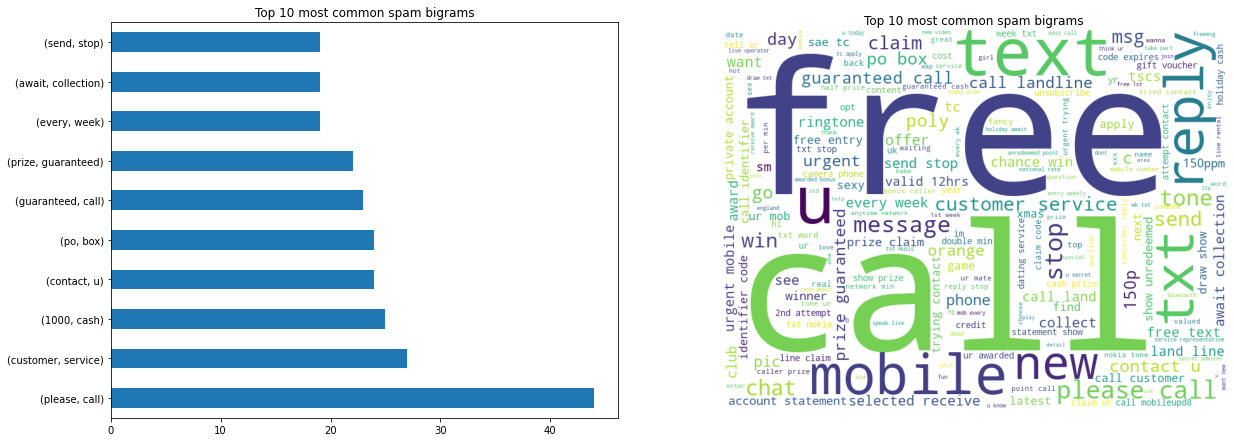

In [13]:
#plot just for one
plt.figure(figsize=(20,16))
plt.subplot(2,2,1)
spam_bigrams.value_counts().head(10).plot.barh()
plt.title('Top 10 most common spam bigrams')
plt.subplot(2,2,2)
img = WordCloud(background_color='white', width=800, height=600).generate(spam_words)
plt.imshow(img)
plt.axis('off')
plt.title('Top 10 most common spam bigrams')
#plt.tight_layout()
plt.show()

In [14]:
# def ngrams_wordcloud (text_list, title_list , n = 2 ):
#     '''
#     takes in a list of text as a string and a list of titles
#     '''
#     for i in  range (0, len(text_list)):
#         plt.figure(figsize=(20,16))
#         plt.subplot(2,2,1)
#         pd.Series(nltk.ngrams(text_list[i].split(), n= n)).value_counts().head(10).plot.barh()
#         plt.title(f'Top 10 most common {title_list[i]} bigrams')
#         plt.subplot(2,2,2)
#         img = WordCloud(background_color='white', width=800, height=600).generate(text_list[i])
#         plt.imshow(img)
#         plt.axis('off')
#         plt.title(f'Top 10 most common {title_list[i]} bigrams')
#         #plt.tight_layout()
#         plt.show()

In [15]:
def ngrams_wordcloud (text_list, title_list, n=2):
    for i in  range (0, len(text_list)):
        plt.figure(figsize=(20,16))
        plt.subplot(2,2,1)
        pd.Series(nltk.ngrams(text_list[i].split(), n=n)).value_counts().head(10).plot.barh()
        plt.title(f'Top 10 most common {title_list[i]} ngrams where n={n}')
        plt.subplot(2,2,2)
        img = WordCloud(background_color='white', width=800, height=600).generate(text_list[i])
        plt.imshow(img)
        plt.axis('off')
        plt.title(f'Top 10 most common {title_list[i]} ngrams where n={n}')
        #plt.tight_layout()
        plt.show()

In [16]:
#text_list= [spam_words, ham_words]

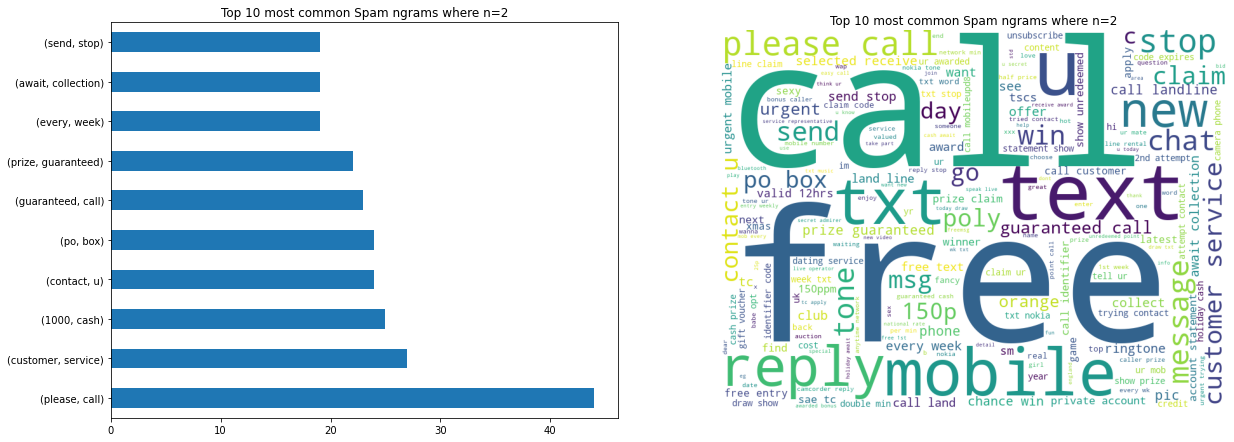

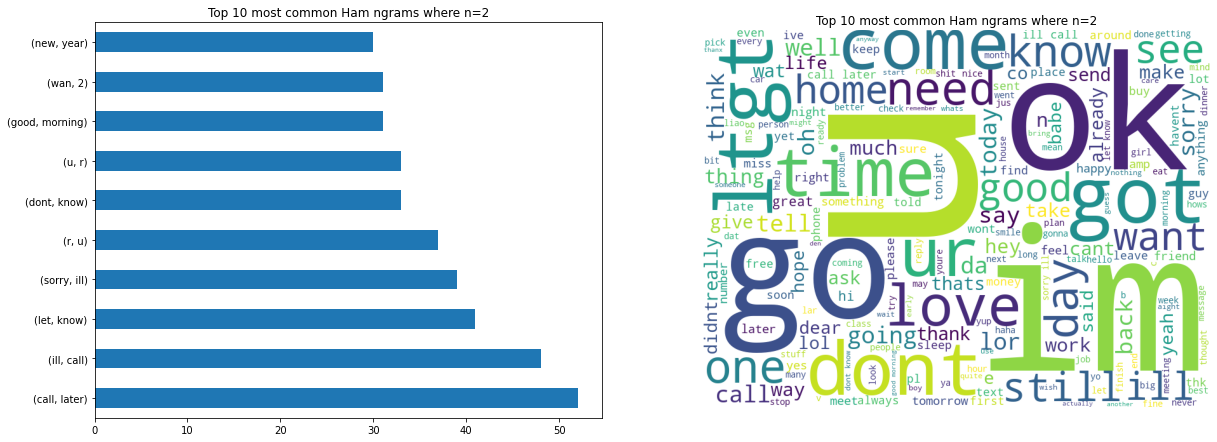

In [17]:
ngrams_wordcloud([spam_words, ham_words], ['Spam', 'Ham'])

c. Is there any overlap in the bigrams for the spam data and the ham data?


***d. Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.***

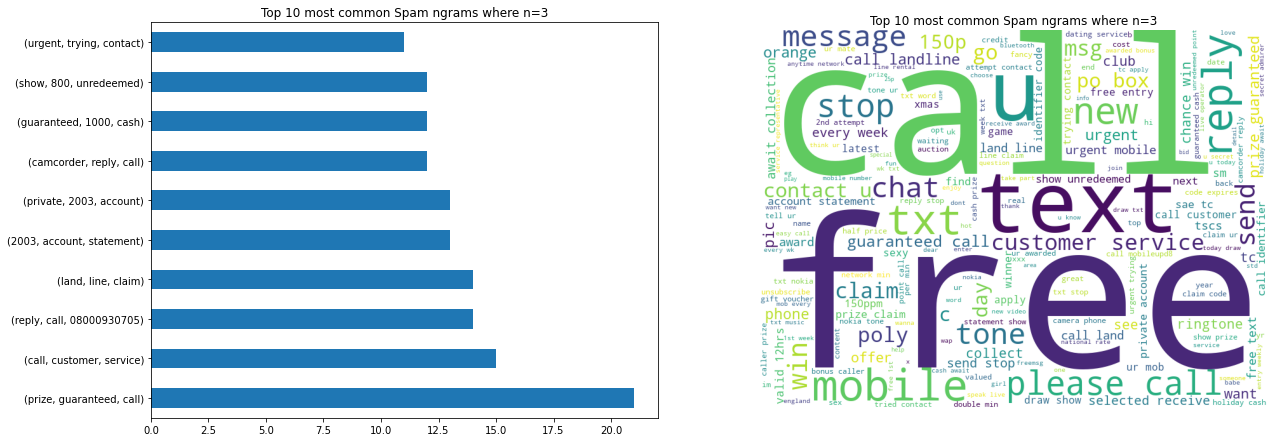

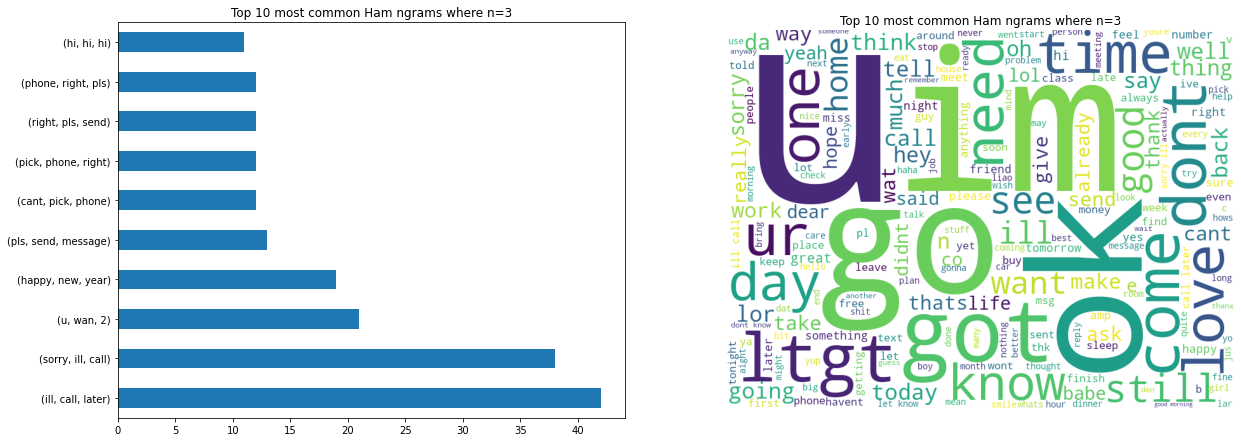

In [18]:
ngrams_wordcloud([spam_words, ham_words], ['Spam', 'Ham'], n=3)

### 2. Explore the blog articles using the techniques discussed in the exploration lesson.

### 3. Explore the news articles using the techniques discussed in the exploration lesson. Use the category variable when exploring.